# Project Title
*all language subject to change*

**Author:** Axel Christian Cabato

**Date:** [Date]

# 1. Introduction
The goal of this project is to utilize a [Kaggle](https://www.kaggle.com) dataset to perform Data Analysis and generate a report. Documenting my processes, insights, and conclusions within this Jupyter Notebook.

This analysis...

In [6]:
# Import pandas
import pandas as pd

## 2. Dataset Loading & Exploratory Data Analysis

- Data Source: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?select=gym_members_exercise_tracking.csv
- Data Format: Comma-separated values (CSV)
- [Kaggle](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?select=gym_members_exercise_tracking.csv) Description: This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics, including key performance indicators such as heart rate, calories burned, and workout duration.

In [7]:
# Load the data into a pandas DataFrame using .read_csv()
df = pd.read_csv("C:/Users/AxelC/Desktop/ME/Career/PROJECTS/Data Science & Analysis/da-proj-1-1/gym_members_exercise_tracking.csv")

# Confirming successful load of the dataset by previewing the last 5 observations
df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


### Exploratory Data Analysis

#### Data Profiling

In [8]:
# Output a concicise summary of the DataFrame
print("DATAFRAME SUMMARY")
df.info()

print("\n")

# Check the dataset for any missing values
print("MISSING VALUES CHECK")
print(df.isnull().sum())

DATAFRAME SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  9

Through our profiling of the dataset, we can confirm its structural integrity. It consists of 973 observations and 15 columns, with each column appropriately named and typed according to its quantitative or qualitative nature. A complete check for missing values across all fields revealed none. Also, this initial inspection of the data showed no signs of extreme outliers or data entry errors.

In [9]:
# Generate descriptive statistics for "BMI" & "Fat_Percentage" columns
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


All numerical features appear to have a reasonable range of values.

For **BMI** and **Fat_Percentage**: 
- The minimum and maximum values for both are physiologically plausible, confirming the data is within a realistic human-centric scale.
- They also exhibit a symmetrical distribution, as evidenced by their mean and median values being in close proximity. 
    - This central tendency, combined with a reasonable standard deviation for each, suggests the absence of significant outliers, indicating a consistent and predictable spread of values for both metrics within the dataset.

In [10]:
# Return the frequency of each distinct row in the DataFrame
df[["Gender", "Workout_Type"]].value_counts()

Gender  Workout_Type
Male    Strength        135
        Yoga            133
        Cardio          129
Female  Cardio          126
        Strength        123
Male    HIIT            114
Female  HIIT            107
        Yoga            106
Name: count, dtype: int64

All categorical features contain a small and consistent set of unique values. Particularly for **Gender** and **Workout_Type**:
- For **Gender**, it is a binary categorical value with only two disctinct classes ("Male" and "Female"). The absence of additional unique values, such as inconsistent spellings, abbreviations, or missing value placeholders, confirms the high degree of data consistency for this feature.
- Similarly, **Workout_Type** also has two disctinct and consistently labeled classes: "Cardio" and "Strength". This categorical integrity ensures that the variable is ready for direct use in analysis or for a simple transformation into a quantitative format, such as one-hot encoding, without requiring a separate data cleaning stage.

#### Recognizing the Data Source & Context

While clean in structure, the dataset contains several potential biases, limitations, and quirks that a data analyst must consider. The primary bias is that the dataset is simulated and was generated using averages from publicly available studies and industry reports. This means the data may under- or over-represent certain behaviors or characteristics.
- For instance, the randomization of Experience_Level and Workout_Frequency might not perfectly reflect the actual distribution of gym members, where, for example, a large number might be beginners who work out less frequently. **This synthetic nature is the most significant limitation, as it lacks the unpredictable and messy nuances of real human behavior.**
- Any insights or models derived from this dataset would need to be validated with actual, real-world data before being applied to a genuine scenario.

The dataset also has a few quirks that are uncommon in real-world data. It has **no missing values** and all categorical values are perfectly consistent, *which is highly unusual*. 

Furthermore, the data is simplified and contains only the variables that were explicitly defined in the generation process. 
- For example, the **Workout_Type** column is limited to a small, consistent set of categories (*Cardio*, *Strength*, *Yoga*, *HIIT*), and does not reflect the full range of possible exercises performed by gym members.

> This foundational understanding will serve as a solid basis for our deeper exploratory data analysis.

---

To prepare the data for any audience who might be more familiar with imperial units, I will perform some feature engineering by constructing new attributes from the existing dataset.
- Specifically, I will convert the `Weight (kg)` and `Height (m)` variables from their current metric system to their imperial counterparts. This will be done to ensure the data is standardized for any subsequent statistical analysis and for enhanced data visualization tailored to our target audience.

In [11]:
df["Height (ft)"] = round(df["Height (m)"] * 3.28, 2)
df["Weight (lb)"] = round(df["Weight (kg)"] * 2.2)

df[["Height (m)", "Height (ft)","Weight (kg)", "Weight (lb)"]]

,Height (m),Height (ft),Weight (kg),Weight (lb)
0,1.71,5.61,88.3,194.0
1,1.53,5.02,74.9,165.0
2,1.66,5.44,68.1,150.0
3,1.70,5.58,53.2,117.0
4,1.79,5.87,46.1,101.0
...,...,...,...,...
968,1.74,5.71,87.1,192.0
969,1.61,5.28,66.6,147.0
970,1.76,5.77,60.4,133.0
971,1.83,6.00,126.4,278.0


In [12]:
df[["Height (ft)", "Weight (lb)"]].describe()

,Height (ft),Weight (lb)
count,973.000000,973.000000
mean,5.650021,162.476876
std,0.418962,46.663302
min,4.920000,88.000000
25%,5.310000,128.000000
50%,5.610000,154.000000
75%,5.900000,189.000000
max,6.560000,286.000000


I use the `.describe()` method to validate the newly-engineered `Weight (lbs)` and `Height (ft)` features, confirming that the new columns have a reasonable range of values and are correctly populated. This ensures the integrity of our dataset for subsequent analysis.

> I will be using Imperial units in my analyses going foward.

---

#### Data Visualization

Having performed the necessary data profiling and cleaning, I can now move on to Data Visualization. By visually exploring the dataset, I'll gain a deeper understanding of the health metrics and workout habits of the simulated gym members.

Firstly, I have determined that the first step of my visual analysis should be to examine the distribution of our numerical features individually. 

**Univariate analysis** will allow me to understand the central tendency, the spread of the data, and to easily spot any potential outliers. To accomplish this, I will generate histograms for each of the key numerical columns.

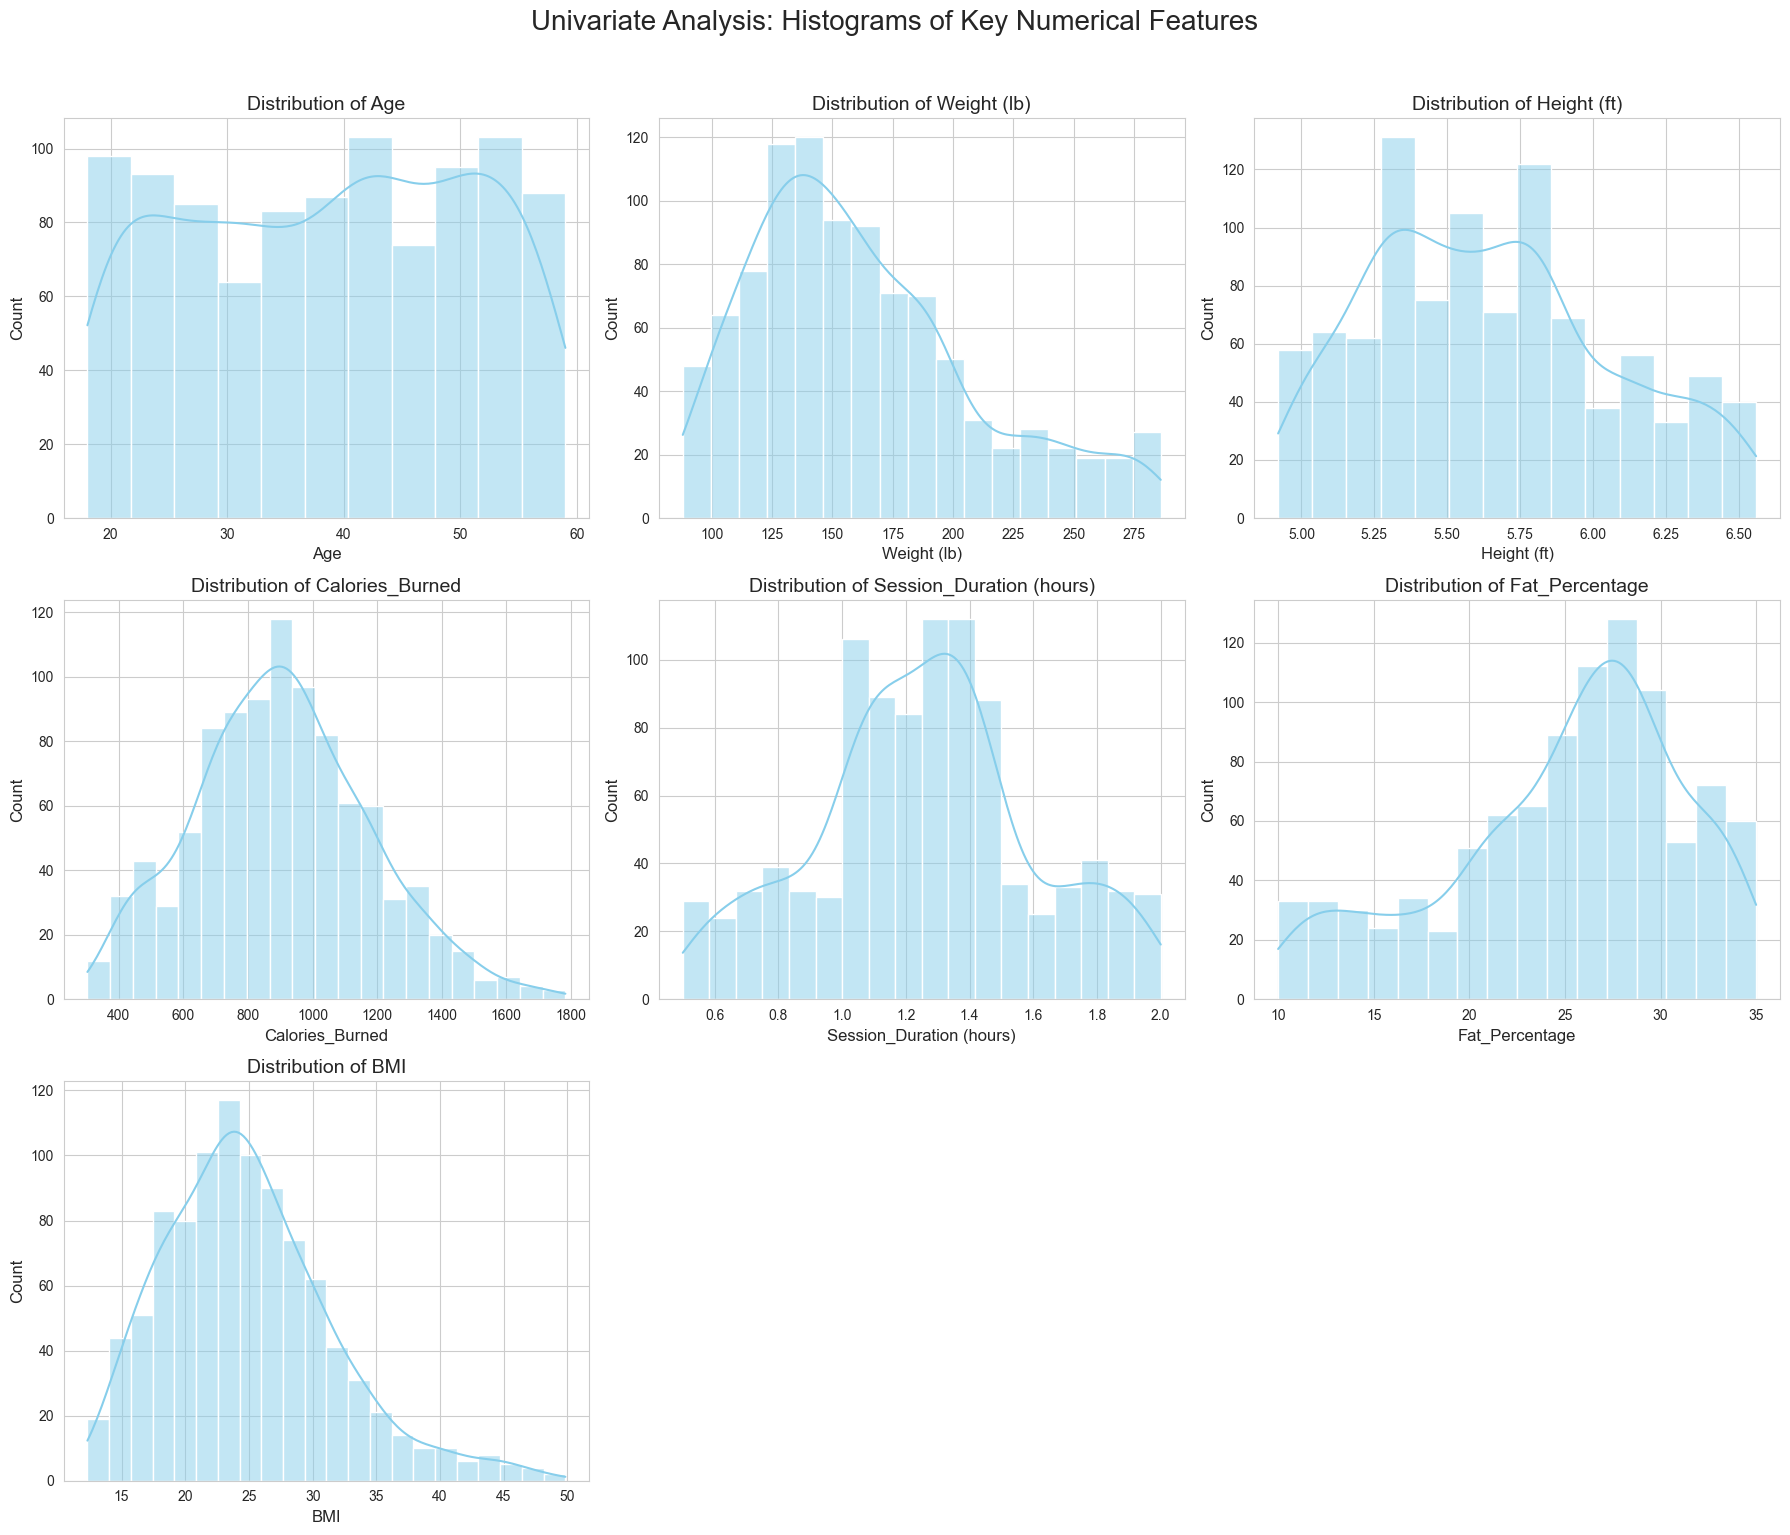

In [15]:
# Import Matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features for univariate analysis
numerical_features = ['Age', 'Weight (lb)', 'Height (ft)', 'Calories_Burned', 'Session_Duration (hours)', 'Fat_Percentage', 'BMI']

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots
# We will use a 3x3 grid for the 7 plots.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
# Flatten the axes array to easily iterate through it
axes = axes.flatten()

# Iterate through the numerical features and create a histogram for each
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    # Use seaborn's histplot to create a histogram with a KDE curve
    sns.histplot(data=df, x=feature, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

# Set a main title for the entire figure
fig.suptitle('Univariate Analysis: Histograms of Key Numerical Features', fontsize=20, y=1.02)

# Adjust layout to prevent titles from overlapping
plt.tight_layout()

# Display the plots
plt.show()

Next, I shift my focus onto the categorical data. I will use bar charts to compare a numerical variable's summary statistics across different categories, or simply to count how many members fall into each category. This helps me understand the composition of our dataset and how different groups behave.

___

## 3. Data Cleaning & Transformation

Since the dataset has no missing values, inconsistent formats, or clear outliers, we conclude it is "clean" and does not need to undergo any data cleansing.

### Data Transformation

This section outlines the process of transforming the raw dataset to ensure it is in the optimal format for analysis and model building. While the dataset has high structural integrity with no missing values, several features require transformation to be used effectively. Specifically, we will address the conversion of categorical data into a numerical format, and the scaling of numerical features to standardize their range. This process ensures all variables are ready for potential use in machine learning models, preventing potential issues with feature bias and performance.

#### Feature Scaling

We standardize the numerical columns using `StandardScaler` from the `scikit-learn` library, transforming its values so that they have a **mean of 0** and a **standard deviation of 1**.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Identify numerical columns to scale
numerical_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled data (first 5 rows)
print(df[numerical_cols].head())

#### Encoding Categorical Variables

We use `get_dummies()` from `pandas` to perform one-hot encoding.

In [ ]:
# Identify categorical columns to encode
categorical_cols = ['Gender', 'Workout_Type']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the transformed DataFrame with the new columns
print(df.head())

#### Binning/Discretization

#### Feature Engineering

#### Skewed Data Handling

#### Dimensionality Reduction

---

*any blocks below this text is meant to added back into the final arrangement of the report at later date*

In [ ]:
# Import visualization libraries, Matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.histplot(data=df, x="Age", stat="count").set(title="Age Histogram Plot")

Based on the histogram, we have fairly distributed range of observed individuals